---
---
# Aula 5: funções e organização de código
---
---

## Problema de Negócio
---

- **Empresa:** House Rocket;

- **Modelo de negócio:**  Compra casas com preço baixo e revendo com o preço mais alto;

- **Desafio:** Encontrar bons negócios dentro do portfólio disponível, ou seja, encontrar casas com preço baixo, em ótima localização e que tenham um ótimo potencial de revenda por um preço mais alto.

O desafio proposto pode ser encontrado [neste](https://sejaumdatascientist.com/os-5-projetos-de-data-science-que-fara-o-recrutador-olhar-para-voce/) link.

## Novas perguntas
---

1. Não estou conseguido usar o mapa que você me enviou por email.

2. Preciso acessar o mapa e o dashboard do meu celular.

3. Organizar o código da aula 04 em funções. 

4. Refazer o gráfico e o dashboard com o Streamlit.

5. Testar novos tipos de Filtro.

## Planejamento da solução
---

### Produto final

- Um Link URL:
    - Informações importantes;
    - Mapa interativo;
    - Dashboard interativo.

### Ferramentas

- Python 3.8.0;
- Jupyter Notebook / VS Code.

## Observação: Extraction, Transformation and Load (ETL)
---

Number of Rows:21613.
Number of Columns 21.

Descriptive Statistics:


,attributes,min,max,mean,median,std
0,id,1000102.00,9900000190.00,4580301520.86,3904930410.00,2876565571.31
1,price,75000.00,7700000.00,540088.14,450000.00,367127.20
2,bedrooms,0.00,33.00,3.37,3.00,0.93
3,bathrooms,0.00,8.00,2.11,2.25,0.77
4,sqft_living,290.00,13540.00,2079.90,1910.00,918.44
5,sqft_lot,520.00,1651359.00,15106.97,7618.00,41420.51
6,floors,1.00,3.50,1.49,1.50,0.54
7,waterfront,0.00,1.00,0.01,0.00,0.09
8,view,0.00,4.00,0.23,0.00,0.77
9,condition,1.00,5.00,3.41,3.00,0.65


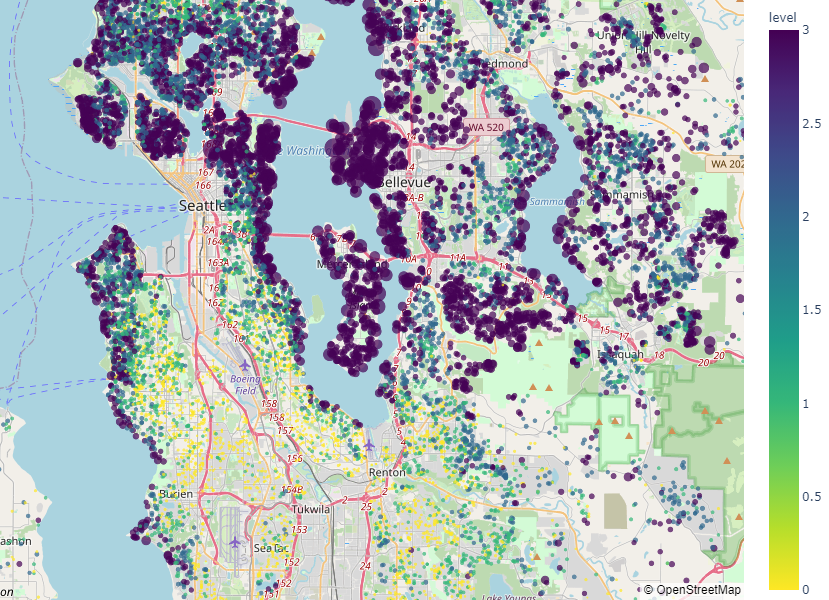

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Functions
def show_dimensions(data):
    '''
    Only print the dimension of dataframe, and return None.
    '''
    print('Number of Rows:{}.'.format( data.shape[0]))
    print('Number of Columns {}.'.format( data.shape[1]))
    return None

def descriptive_statistics(data):
    '''
    Return numeric variables dataframe statistics, including min, max, mean, median and std.
    '''
    df_statistics = data.describe().T.reset_index().rename({'index':'attributes', 
                                                            '50%':'median'}, axis=1)
    df_statistics = df_statistics[['attributes', 'min', 'max', 
                                   'mean', 'median', 'std']]
    return df_statistics

def create_new_attributes(data, geodata=False):
    '''
    Create some variables. These are:
        - house_age;
        - dormitory_type;
        - level;
        - road, house_number, city, country, state (optional).
    This function returns the modified dataframe.
    '''
    # Make new column called: “house_age”.
    data.loc[data['date'] >= pd.to_datetime('2014-01-01'), 'house_age'] = 'new_house'
    data.loc[data['date'] < pd.to_datetime('2014-01-01'), 'house_age'] = 'old_house'
    
    # Make new column called: “dormitory_type”.
    for i in range(len(data)):
        if data.loc[i, 'bedrooms'] == 1:
            data.loc[i, 'dormitory_type'] = 'studio'
            
        elif data.loc[i, 'bedrooms'] == 2:
            data.loc[i, 'dormitory_type'] = 'apartment'
            
        else:
            data.loc[i, 'dormitory_type'] = 'house'
        
    # define level of prices.
    for i in range(len(data)):
        if data.loc[i, 'price'] <= 321950:
            data.loc[i, 'level'] = 0
            
        elif ( data.loc[i,'price'] > 321950 ) & ( data.loc[i,'price'] <= 450000):
            data.loc[i, 'level'] = 1
            
        elif ( data.loc[i,'price'] > 450000 ) & ( data.loc[i,'price'] <= 645000):
            data.loc[i, 'level'] = 2
        
        else:
            data.loc[i, 'level'] = 3
    
    # Make location columns.
    if geodata == True:
        # initializa API
        geolocator = Nominatim(user_agent='ehm')

        # Create empty rows.
        data.loc[:, 'road'] = np.nan
        data.loc[:, 'house_number'] = np.nan
        data.loc[:, 'city'] = np.nan
        data.loc[:, 'county'] = np.nan
        data.loc[:, 'state'] = np.nan

        for i in range( len( data ) ):
            # make request
            query = str( data.loc[i, 'lat'] ) + ',' + str( data.loc[i, 'long'] )
            response = geolocator.reverse( query )

            # parse data
            if 'house_number' in response.raw['address']:
                data.loc[i, 'house_number'] = response.raw['address']['house_number']

            if 'road' in response.raw['address']:
                data.loc[i, 'road'] = response.raw['address']['road']

            if 'city' in response.raw['address']:
                data.loc[i, 'city'] = response.raw['address']['city']

            if 'county' in response.raw['address']:
                data.loc[i, 'county'] = response.raw['address']['county']

            if 'state' in response.raw['address']:
                data.loc[i, 'state'] = response.raw['address']['state']
    return data

def draw_map(data):
    '''
    This function returns the plotly map point.
    '''
    # map
    houses = data[['id', 'lat', 'long', 'price', 'level']]
    fig = px.scatter_mapbox(houses,
                            lat="lat",
                            lon="long",
                            color="level",
                            size="price",
                            color_continuous_scale=px.colors.sequential.Viridis_r,
                            size_max=15,
                            zoom=10)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    return fig

if __name__ == '__main__':
    # Loading Dataset
    path = 'C:/Users/Emerson/Documents/Jupyter Projects/pthon_do_zero_ao_ds/datasets/kc_house_data.csv'
    df = pd.read_csv(path)

    show_dimensions(df)

    # Converting date type
    df['date'] = pd.to_datetime(df['date'])

    # Making basic descriptive analysis
    print('\nDescriptive Statistics:')
    display(descriptive_statistics(df))

    # Creating new attributes
    create_new_attributes(df, geodata=False)

    # Drawing map
    fig = draw_map(df)
    fig.show()